Задача: обучить нейросеть распознавать рукописный текст по картинке. Библиотека mnist представляет собой базу данных из 70000 чёрно-белых изображений цифры от 0 до 9. Каждое изображение это numpy.ndarray размером 28x28, где каждый пиксель это значение от 0 до 255, где чем выше значение, тем выше яркость пикселя.  Можно использовать любые библиотеки и фреймворки, за исключением готовых предобученных нейросетей.

In [57]:
# Установка библиотеки в google collab
#!pip install mnist

In [58]:
import numpy as np
import mnist

In [59]:
#Загрузка изображений из сети
train_X, train_Y, test_X, test_Y = mnist.train_images(), mnist.train_labels(), mnist.test_images(), mnist.test_labels()

In [60]:
print(f"Train images shape: {train_X.shape}")
print(f"Train labels shape: {train_Y.shape}")
print(f"Test images shape: {test_X.shape}")
print(f"Test labels shape: {test_Y.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


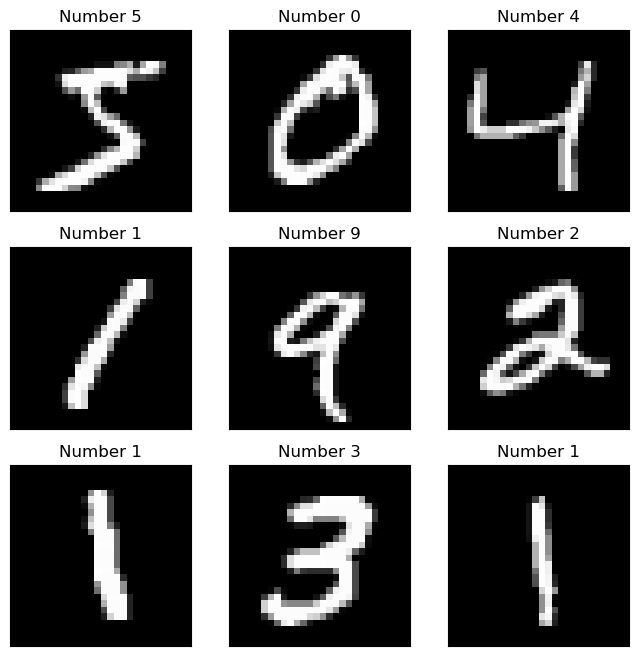

In [61]:
#Просмотр изображений через matplotlib
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,8))
axs = fig.subplots(3,3)
for i, ax in enumerate(axs.flat):
  ax.imshow(train_X[i],cmap=plt.get_cmap('gray'))
  ax.set(xticks=[], yticks=[])
  ax.title.set_text(f'Number {train_Y[i]}')

In [62]:
#!pip install tensorflow

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

In [64]:
# Нормализация данных и преобразование меток
train_X = train_X.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_X = test_X.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [65]:
#!pip install hyperopt

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [67]:
# Создание модели
model = models.Sequential() # пустая модель
model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(28, 28, 1))) # первый свёрточный слой (30 фильтров)
model.add(layers.MaxPooling2D((2, 2))) # пулинг в области 2 на 2 пикселя

model.add(layers.Conv2D(60, (3, 3), activation='relu')) # второй свёрточный слой (60 фильтров)
model.add(layers.MaxPooling2D((2, 2))) # пулинг

model.add(layers.Conv2D(60, (3, 3), activation='relu')) # третий свёрточный слой

model.add(layers.Flatten()) # преобразование в одномерный вектор
model.add(layers.Dense(60, activation='relu')) # полносвязный слой (60 нейронов)
model.add(layers.Dense(10, activation='softmax')) # полносвязный слой (10 цифр на выходе)

In [73]:
# Компиляция модели
model.compile(optimizer='adam', # оптимизатор адам
              loss='categorical_crossentropy', # функцция потерь для многоклассовой классификации
              metrics=['accuracy']) # отслеживание точности модели

In [74]:
# Обучение модели (5 эпох, в каждом шаге по 60 образцов)
model.fit(train_X, train_Y, epochs=5, batch_size=60, validation_data=(test_X, test_Y))

Epoch 1/5
1000/1000 [==============================] - 21s 20ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 2/5
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 3/5
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0282 - val_accuracy: 0.9922
Epoch 4/5
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 5/5
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0314 - val_accuracy: 0.9912


In [75]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Функция потерь модели:", test_loss)
print("Точность модели:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0314 - accuracy: 0.9912
Функция потерь модели: 0.03143799677491188
Точность модели: 0.9911999702453613


In [76]:
# Предсказания модели на тестовых данных
predictions = model.predict(test_X)

# Преобразование предсказаний в метки классов
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_Y, axis=1)

# Рассчет матрицы ошибок
confus = confusion_matrix(true_labels, predicted_labels)
print("Матрица ошибок:")
print(confus)

313/313 [==============================] - 2s 8ms/step
Матрица ошибок:
[[ 974    0    1    0    2    0    1    1    0    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   0    0 1028    1    0    0    0    2    1    0]
 [   1    0    2 1001    0    5    0    0    1    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   0    0    0    7    0  882    1    1    0    1]
 [   2    3    0    0    1    1  951    0    0    0]
 [   0    6   11    0    0    0    0 1007    0    4]
 [   2    0    3    0    0    1    0    0  966    2]
 [   1    2    0    0    5    1    0    4    1  995]]


In [77]:
from PIL import Image

In [78]:
# Загрузка изображения
img = Image.open("C:/Users/user/Downloads/IMG_20230915_172143.jpg")

In [16]:
#img.show()

In [17]:
# Преобразование изображения в черно-белый формат
img = img.convert('L')
#img.show()

In [18]:
# Изменение размера изображения до 28x28
img = img.resize((28, 28))

In [19]:
# Преобразование изображения в массив numpy
new_image = np.array(img)

In [20]:
# Пример распознавания цифры на новом изображении
prediction = model.predict(new_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 109ms/step


In [21]:
# Ищем индекс класса с наибольшей вероятностью
predicted_class = np.argmax(prediction)

In [79]:
# Выводим предсказанный класс
print("Цифра:", predicted_class)

Цифра: 8
